In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [2]:
df = pd.read_csv('LED.csv')
for col in df.select_dtypes(include=np.number):
    df.dropna(subset=[col], inplace=True)

df = df.drop('Year', axis=1)  # Preferred way
df = df.drop('Country', axis=1)  # Preferred way

df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(1649, 20)

In [4]:
df['Status'].value_counts()

Status
Developing    1407
Developed      242
Name: count, dtype: int64

In [5]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1649 non-null   object 
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria               

In [7]:
# Change Developed/Developing to Dummy Variables 

df3 = pd.get_dummies(df, prefix=None)
df3.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True


In [8]:
#Predicting Vaccination & Disease Rates

In [9]:
print('Correlations with Polio Vaccination Rate:\n')
df3[df3.columns[0:]].corr()['Polio'][:].to_frame().sort_values(by=['Polio'], ascending=False).round(2)

Correlations with Polio Vaccination Rate:



,Polio
Polio,1.00
Diphtheria,0.61
Hepatitis B,0.46
Schooling,0.35
Life expectancy,0.33
Income composition of resources,0.31
Alcohol,0.24
Status_Developed,0.20
BMI,0.19
GDP,0.16


In [10]:
print('Correlations with Diphtheria Vaccination Rate:\n')
df3[df3.columns[0:]].corr()['Diphtheria '][:].to_frame().sort_values(by=['Diphtheria '], ascending=False).round(2)

Correlations with Diphtheria Vaccination Rate:



,Diphtheria
Diphtheria,1.00
Polio,0.61
Hepatitis B,0.59
Schooling,0.35
Income composition of resources,0.34
Life expectancy,0.34
Alcohol,0.24
Status_Developed,0.20
BMI,0.18
GDP,0.16


In [11]:
print('Correlations with Hepatitis B Vaccination Rate:\n')
df3[df3.columns[0:]].corr()['Hepatitis B'][:].to_frame().sort_values(by=['Hepatitis B'], ascending=False).round(2)

Correlations with Hepatitis B Vaccination Rate:



,Hepatitis B
Hepatitis B,1.00
Diphtheria,0.59
Polio,0.46
Schooling,0.22
Life expectancy,0.20
Income composition of resources,0.18
BMI,0.14
Status_Developed,0.14
Total expenditure,0.11
Alcohol,0.11


In [54]:
def distributions(varname, longname, data):
    '''histogram of target variable for Developed and Developing Countries'''
    
    # Ensure 'Status' column exists in data
    if 'Status' not in data.columns:
        raise ValueError("'Status' column not found in DataFrame")

    # Ensure the 'Status' column contains expected values
    if not set(['Developed', 'Developing']).issubset(data['Status'].unique()):
        raise ValueError("The 'Status' column must contain 'Developed' and 'Developing' values")

    # Create figure and subplots
    fig = plt.figure(figsize=(10, 4))
    title = fig.suptitle(longname, fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    # Developed countries histogram
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Developed Countries")
    freq1, bins1, patches1 = ax1.hist(data.loc[data['Status'] == 'Developed', varname], bins=15, edgecolor='white', linewidth=1)

    # Developing countries histogram
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title("Developing Countries")
    freq2, bins2, patches2 = ax2.hist(data.loc[data['Status'] == 'Developing', varname], bins=15, edgecolor='white', linewidth=1)

    plt.show()

   

In [13]:
def dataTransform(X_train, X_test, n, k, transformation):
    '''Transform the data via Standard Scalar, PCA, or KPCA'''
            
    if transformation == 'KPCA':
        kpca = KernelPCA(n_components=k, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state=1)
        kpca.fit(X_train)
        X_train = kpca.transform(X_train)
        X_test = kpca.transform(X_test)
               
    elif transformation != 'KPCA':
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)        

        if transformation == 'PCA':
            pca = PCA(n_components=n)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_test = pca.transform(X_test)
                  
    return X_train, X_test 

In [14]:
def findPCA(data, varname, model, variables):
    '''Find optimal number of compoenents for PCA''' 

    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
    
    # Scale the data using StandardScaler
    X_train, X_test = dataTransform(X_train, X_test, variables, variables, 'SS')

    scores_pca = []
    mdl = model

    for i in range(1, variables):
        pca = PCA(n_components=i, random_state=0)
        X_train2 = pca.fit_transform(X_train)
        X_test2 = pca.transform(X_test)

        score = mdl.fit(X_train2, y_train).score(X_test2, y_test)
        scores_pca.append(score)

    print(pca.explained_variance_ratio_.cumsum())
    plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
    plt.xticks(ticks= range(X_train.shape[1]), labels=[i+1 for i in range(X_train.shape[1])])
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained')
    plt.show()
    

In [15]:
def runModel2(X_train, X_test, y_train, y_test, model): 
    '''run model and return accuracy'''

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    R2_train = metrics.r2_score(y_train, pred_train)
    R2_test= metrics.r2_score(y_test, pred_test) 
    R2_diff = metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test) 
    RMSE_train = metrics.mean_squared_error(y_train, pred_train) 
    RMSE_test = metrics.mean_squared_error(y_test, pred_test)
    
    return R2_train, R2_test, R2_diff, RMSE_train, RMSE_test

In [16]:
def runModels(modellist, transformations, n, k, varname, data):
    '''Run multiple models, return accuracy'''
    
    # Split data in train-test sets
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
      
    mdlacc = pd.DataFrame(columns = ['Model', 'Transformation', 'R2 Train', 'R2 Test', 
                                     'R2 Diff', 'RMSE Train', 'RMSE Test'])

    for t in transformations:
        
        # Transform the data, 'none' should pass through dataTransform function with no changes
        X_train2, X_test2 = dataTransform(X_train, X_test, n, k, t)        

        for m in modellist:        
            # Run model on transformed data and return accuracy and error 
            
            if str(m) in ['DecisionTreeRegressor()', 'RandomForestRegressor()', 
                          'AdaBoostRegressor()', 'GradientBoostingRegressor()']:
                if t != 'SS':
                    # Skip using Standard Scaler on tree-based models 
                    R2_train, R2_test, R2_diff, RMSE_train, RMSE_test = runModel2(X_train2, X_test2, y_train, y_test, m)
                    mdlacc = mdlacc.append({'Model' : str(m), 'Transformation' : t, 
                                    'R2 Train' : R2_train, 'R2 Test' : R2_test, 'R2 Diff' : R2_diff, 
                                    'RMSE Train' : RMSE_train, 'RMSE Test' : RMSE_test}, ignore_index = True)

            else:             
                R2_train, R2_test, R2_diff, RMSE_train, RMSE_test = runModel2(X_train2, X_test2, y_train, y_test, m)
                mdlacc = mdlacc.append({'Model' : str(m), 'Transformation' : t, 
                                        'R2 Train' : R2_train, 'R2 Test' : R2_test, 'R2 Diff' : R2_diff, 
                                        'RMSE Train' : RMSE_train, 'RMSE Test' : RMSE_test}, ignore_index = True)

    return mdlacc.sort_values(by=['R2 Test'], ascending=False).round(2)

In [17]:
def best_param(params, model, X_train, y_train):
    '''find the best parameter value'''
    
    mdl = model()
    gs = GridSearchCV(estimator=mdl, param_grid=params, scoring='r2')

    gs.fit(X_train, y_train)
    best_estimator = gs.best_estimator_

    return best_estimator 
    

In [44]:
def tunedModel(varname, data, model, t, n, k):
    '''Tune the best model and return top features'''
    
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
    
    # Transform the data, 'none' should pass back original data
    X_train2, X_test2 = dataTransform(X_train, X_test, n, k, t)
    
    # Find best parameters via grid search
    if model == GradientBoostingRegressor:
        params = dict(learning_rate=[0.001, 0.01, 0.1, 0.3, 0.6, 1], n_estimators=[10, 50, 100])
    else:
        params = dict(min_samples_split=[2, 5, 10, 25, 50], max_depth=[2, 5, 10, 25])
    
    # Get the best model using grid search
    mdl = best_param(params, model, X, y)
    print('\nBest Model: ', mdl)
    mdl.fit(X_train2, y_train)

    # Predictions
    pred_train = mdl.predict(X_train2)
    pred_test = mdl.predict(X_test2)
    
    # Performance metrics
    r2_train = metrics.r2_score(y_train, pred_train)
    r2_test = metrics.r2_score(y_test, pred_test)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
    
    print('\nR2 on Training:', r2_train)
    print('R2 on Test:    ', r2_test)
    print('\nDifference: ', abs(r2_train - r2_test))
    print('\nRMSE on Training:', rmse_train)
    print('RMSE on Test:    ', rmse_test)
    
    # Feature importance
    features = []
    if hasattr(mdl, 'feature_importances_'):
        for i, feature in enumerate(X.columns):
            importance = mdl.feature_importances_[i].round(2)
            features.append({'Feature': feature, 'Importance': importance})
        
        features_df = pd.DataFrame(features).sort_values(by='Importance', ascending=False)
        
        print('\nFeature Importance:')
        ax = features_df.sort_values(by='Importance', ascending=True).plot.barh(
            x='Feature', y='Importance', legend=False, figsize=(8, 6)
        )
        ax.set_xlabel('Importance')
        ax.set_ylabel('Features')
        plt.show()
    else:
        print("\nThe model does not support feature importance.")
        features_df = pd.DataFrame()
    
    return features_df


In [50]:
def defaultSettings(varname, data, model, t, n, k):
    """Run a model with default settings and return feature importance"""
    
    # Split data into features (X) and target (y)
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    # Transform the data, 'none' should pass back original data
    X_train2, X_test2 = dataTransform(X_train, X_test, n, k, t)

    # Instantiate and fit the model
    mdl = model()
    print('\nBest Model: ', mdl)
    mdl.fit(X_train2, y_train)

    # Predictions and performance metrics
    pred_train = mdl.predict(X_train2)
    pred_test = mdl.predict(X_test2)
    
    r2_train = metrics.r2_score(y_train, pred_train)
    r2_test = metrics.r2_score(y_test, pred_test)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
    
    print('\nR2 on Training:', r2_train)
    print('R2 on Test:    ', r2_test)
    print('\nDifference: ', abs(r2_train - r2_test))
    print('\nRMSE on Training:', rmse_train)
    print('RMSE on Test:    ', rmse_test)

    # Feature importance
    features = []
    if hasattr(mdl, 'feature_importances_'):
        for i, feature in enumerate(X.columns):
            importance = mdl.feature_importances_[i]
            features.append({'Feature': feature, 'Importance': importance})
        
        features_df = pd.DataFrame(features).sort_values(by='Importance', ascending=False)
        
        print('\nFeature Importance:')
        ax = features_df.sort_values(by='Importance', ascending=True).plot.barh(
            x='Feature', y='Importance', legend=False, figsize=(8, 6)
        )
        ax.set_xlabel('Importance')
        ax.set_ylabel('Features')
        plt.show()
    else:
        print("\nThe model does not support feature importance.")
        features_df = pd.DataFrame()
    
    return features_df


In [20]:
#Predicting Polio Vaccination Rates

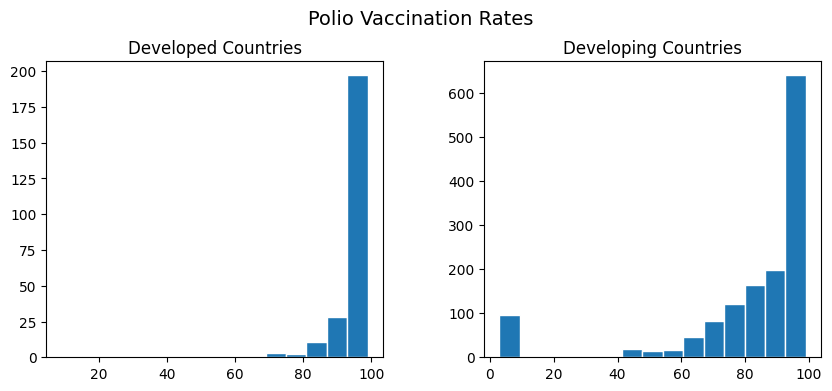

In [21]:
varname = 'Polio'
longname = 'Polio Vaccination Rates'
distributions(varname, longname, df)

In [22]:
# Remove highly correlated variable 
dfp = df3.drop(columns=['Diphtheria '],axis=1)

In [23]:
# Split Developing and Developed Countries 
dfp1 = dfp.loc[dfp['Status_Developing']==1]
dfp0 = dfp.loc[dfp['Status_Developing']==0]
dfp1 = dfp1.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
dfp0 = dfp0.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
print(dfp1.shape)
print(dfp0.shape)

(1407, 18)
(242, 18)


In [24]:
print('Correlations with Polio Vaccination Rate in Developing Countries:\n')
dfp1[dfp1.columns[0:]].corr()['Polio'][:].to_frame().sort_values(by=['Polio'], ascending=False).round(2)

Correlations with Polio Vaccination Rate in Developing Countries:



,Polio
Polio,1.00
Hepatitis B,0.47
Schooling,0.31
Life expectancy,0.28
Income composition of resources,0.26
Alcohol,0.16
BMI,0.15
GDP,0.12
Total expenditure,0.09
percentage expenditure,0.08


In [25]:
print('Correlations with Polio Vaccination Rate in Developed Countries:\n')
dfp0[dfp0.columns[0:]].corr()['Polio'][:].to_frame().sort_values(by=['Polio'], ascending=False).round(2)

Correlations with Polio Vaccination Rate in Developed Countries:



,Polio
Polio,1.00
under-five deaths,0.16
infant deaths,0.14
Total expenditure,0.12
Population,0.09
Adult Mortality,0.07
Hepatitis B,0.07
Life expectancy,0.06
Income composition of resources,0.02
GDP,0.02


PCA for Developing Countires Polio Vaccination Rates 

[0.30875635 0.47691839 0.58277543 0.6585961  0.72566647 0.77864497
 0.82274637 0.86256851 0.89667688 0.92242648 0.94617971 0.9685909
 0.98275285 0.99106779 0.99579156 0.99984917 1.        ]


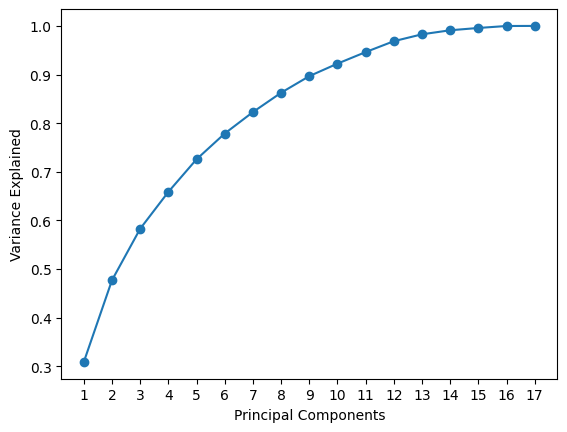

In [26]:
# Find ideal number of Principle Components 
n = dfp1.shape[1]
print('PCA for Developing Countires', longname, '\n')
findPCA(dfp1, varname, RandomForestRegressor(), n)

In [38]:
def runModels(modellist, transformations, n, k, varname, data):
    '''Run multiple models and return accuracy.'''
    
    # Split data into train-test sets
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
    
    # Initialize an empty DataFrame to store results
    mdlacc = pd.DataFrame(columns=['Model', 'Transformation', 'R2 Train', 'R2 Test',
                                   'R2 Diff', 'RMSE Train', 'RMSE Test'])

    for t in transformations:
        # Transform the data ('none' should pass through dataTransform with no changes)
        X_train2, X_test2 = dataTransform(X_train, X_test, n, k, t)

        for m in modellist:
            # Handle tree-based models separately (skip Standard Scaler)
            if str(m) in ['DecisionTreeRegressor()', 'RandomForestRegressor()', 
                          'AdaBoostRegressor()', 'GradientBoostingRegressor()'] and t == 'SS':
                continue
            
            # Run model and collect performance metrics
            R2_train, R2_test, R2_diff, RMSE_train, RMSE_test = runModel2(X_train2, X_test2, y_train, y_test, m)
            
            # Create a new row as a DataFrame
            new_row = pd.DataFrame([{
                'Model': str(m),
                'Transformation': t,
                'R2 Train': R2_train,
                'R2 Test': R2_test,
                'R2 Diff': R2_diff,
                'RMSE Train': RMSE_train,
                'RMSE Test': RMSE_test
            }])
            
            # Append the new row using pd.concat
            mdlacc = pd.concat([mdlacc, new_row], ignore_index=True)

    # Sort results by R2 Test score and round for better readability
    return mdlacc.sort_values(by=['R2 Test'], ascending=False).round(2)

In [28]:
bestmodels_Polio = pd.DataFrame(columns=[
    'Variable', 'Country Status', 'Best Default Model', 'Best Data Transform',
    'R2 Train', 'R2 Test', 'R2 Diff', 'RMSE Train', 'RMSE Test'
])

# Create the new row as a dictionary
new_row = {
    'Variable': varname,
    'Country Status': 'Developing',
    'Best Default Model': 'RandomForest',
    'Best Data Transform': 'none',
    'R2 Train': 0.97,
    'R2 Test': 0.76,
    'R2 Diff': 0.22,
    'RMSE Train': 4.67,
    'RMSE Test': 39.61
}

# Add the row to the DataFrame, handling the first row separately
if bestmodels_Polio.empty:
    bestmodels_Polio = pd.DataFrame([new_row], columns=bestmodels_Polio.columns)
else:
    new_row_df = pd.DataFrame([new_row], columns=bestmodels_Polio.columns)
    bestmodels_Polio = pd.concat([bestmodels_Polio, new_row_df], ignore_index=True)

PCA for Developed Countires Polio Vaccination Rates 

[0.29305746 0.45332274 0.54985881 0.62450542 0.6902428  0.74853572
 0.80369826 0.85557167 0.90365982 0.93516005 0.9647213  0.98473105
 0.99413399 0.99721374 0.99975502 1.         1.        ]


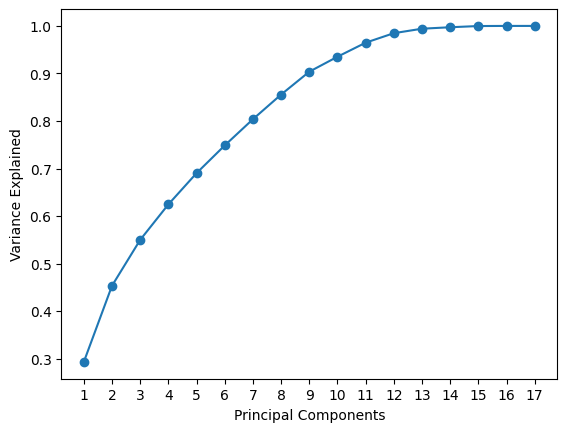

In [30]:
# Find ideal number of Principle Components 
n = dfp0.shape[1]
print('PCA for Developed Countires', longname, '\n')
findPCA(dfp0, varname, RandomForestRegressor(), n)

In [39]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k=100
mdlacc = runModels(modellist, transformations, pca, k, varname, dfp0)

print('Model Performance for Developed Countries', longname)
mdlacc.head(n=10)

bestmodels_Polio = pd.DataFrame(columns=[
    'Variable', 'Country Status', 'Best Default Model', 'Best Data Transform',
    'R2 Train', 'R2 Test', 'R2 Diff', 'RMSE Train', 'RMSE Test'
])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18688\4025003083.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mdlacc = pd.concat([mdlacc, new_row], ignore_index=True)


Model Performance for Developed Countries Polio Vaccination Rates
CPU times: total: 6.11 s
Wall time: 7.97 s


In [40]:
bestmodels_Polio = pd.DataFrame(columns=[
    'Variable', 'Country Status', 'Best Default Model', 'Best Data Transform',
    'R2 Train', 'R2 Test', 'R2 Diff', 'RMSE Train', 'RMSE Test'
])

# Create the new row as a dictionary
new_row = {
    'Variable': varname,
    'Country Status': 'Developing',
    'Best Default Model': 'RandomForest',
    'Best Data Transform': 'none',
    'R2 Train': 0.97,
    'R2 Test': 0.76,
    'R2 Diff': 0.22,
    'RMSE Train': 4.67,
    'RMSE Test': 39.61
}

# Add the row to the DataFrame, handling the first row separately
if bestmodels_Polio.empty:
    bestmodels_Polio = pd.DataFrame([new_row], columns=bestmodels_Polio.columns)
else:
    new_row_df = pd.DataFrame([new_row], columns=bestmodels_Polio.columns)
    bestmodels_Polio = pd.concat([bestmodels_Polio, new_row_df], ignore_index=True)

In [41]:
bestmodels_Polio

,Variable,Country Status,Best Default Model,Best Data Transform,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,Polio,Developing,RandomForest,none,0.97,0.76,0.22,4.67,39.61


Best model performance for: Polio Vaccination Rates in Developing Countries

Best Model:  RandomForestRegressor(max_depth=2, min_samples_split=5)

R2 on Training: 0.352916085030881
R2 on Test:     0.31523862395207947

Difference:  0.037677461078801544

RMSE on Training: 18.709158123986537
RMSE on Test:     20.34757255372934

Feature Importance:


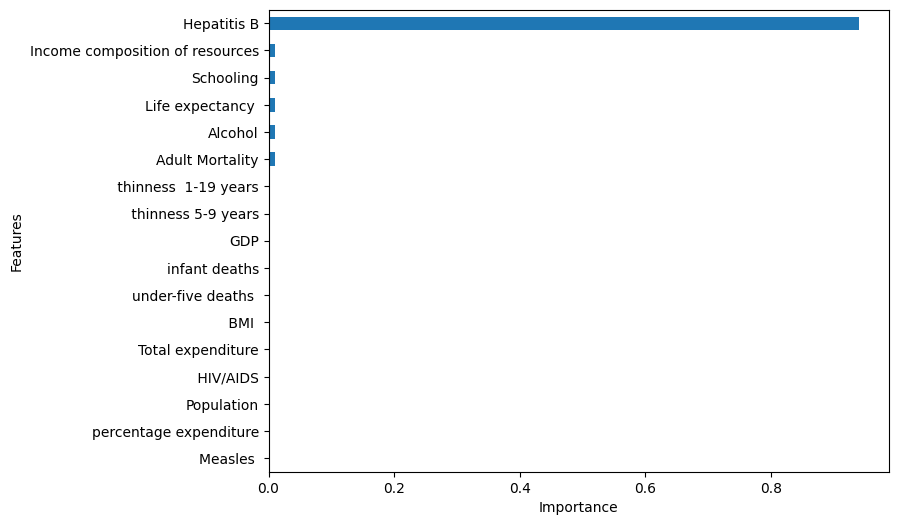

                            Feature  Importance
5                       Hepatitis B        0.94
0                  Life expectancy         0.01
1                   Adult Mortality        0.01
3                           Alcohol        0.01
15  Income composition of resources        0.01
16                        Schooling        0.01
6                          Measles         0.00
4            percentage expenditure        0.00
2                     infant deaths        0.00
8                under-five deaths         0.00


In [45]:
print('Best model performance for:', longname, 'in Developing Countries')
features = tunedModel(varname, dfp1, RandomForestRegressor, 'none', 0, 0)
print(features.head(n=10))

Best model performance for: Polio Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor(learning_rate=0.001, n_estimators=10)

R2 on Training: 0.010539461101152892
R2 on Test:     -0.029733619474145767

Difference:  0.04027308057529866

RMSE on Training: 4.036022608022845
RMSE on Test:     12.540557789232084

Feature Importance:


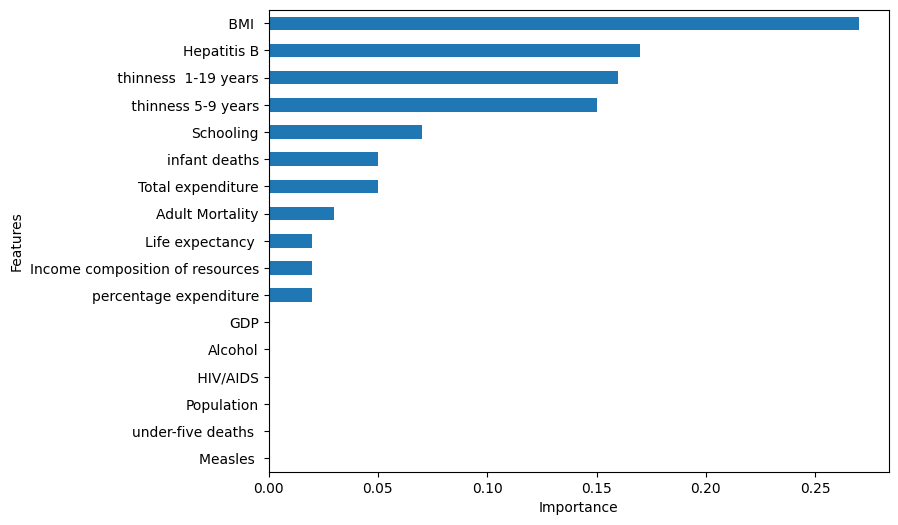

CPU times: total: 9.59 s
Wall time: 16.3 s


,Feature,Importance
7,BMI,0.27
5,Hepatitis B,0.17
13,thinness 1-19 years,0.16
14,thinness 5-9 years,0.15
16,Schooling,0.07
2,infant deaths,0.05
9,Total expenditure,0.05
1,Adult Mortality,0.03
0,Life expectancy,0.02
15,Income composition of resources,0.02


In [46]:
%%time 

#Tune the model 
print('Best model performance for:', longname, ' in Developed Countries')
features = tunedModel(varname, dfp0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Polio Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor()

R2 on Training: 0.987333809335449
R2 on Test:     0.12407675640249982

Difference:  0.8632570529329492

RMSE on Training: 0.4566435856315652
RMSE on Test:     11.566113059861587

Feature Importance:


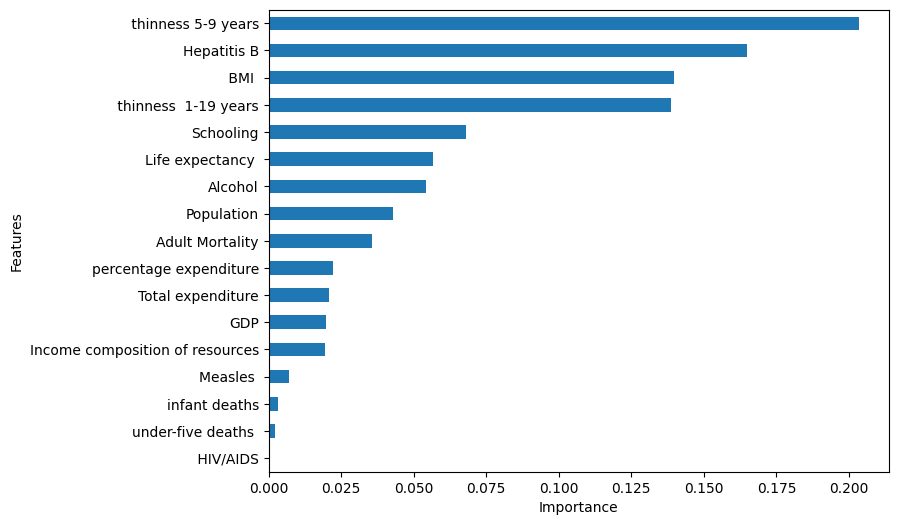

CPU times: total: 547 ms
Wall time: 679 ms


,Feature,Importance
14,thinness 5-9 years,0.203435
5,Hepatitis B,0.164941
7,BMI,0.139805
13,thinness 1-19 years,0.138757
16,Schooling,0.068051
0,Life expectancy,0.056753
3,Alcohol,0.054362
12,Population,0.042847
1,Adult Mortality,0.035789
4,percentage expenditure,0.022230


In [51]:
%%time 

#Default settings were better 
print('Best model performance for:', longname, ' in Developed Countries')
features = defaultSettings(varname, dfp0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)

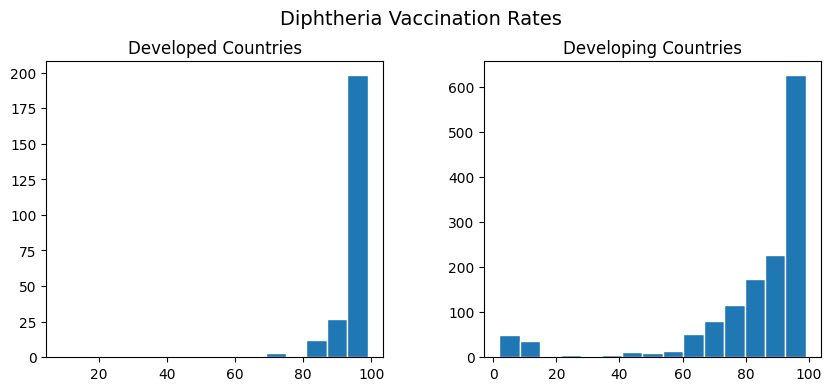

In [56]:
varname = 'Diphtheria '
longname = 'Diphtheria Vaccination Rates'
distributions(varname, longname, df)

In [57]:
# Remove highly correlated variable 
dfd = df3.drop(columns=['Polio'],axis=1)

In [61]:
dfd1 = dfd.loc[dfp['Status_Developing']==1]
dfd0 = dfd.loc[dfp['Status_Developing']==0]
dfd1 = dfd1.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
dfd0 = dfd0.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
print(dfd1.shape)
print(dfd0.shape)

(1407, 18)
(242, 18)


In [62]:
print('Correlations with Diphtheria Vaccination Rate in Developing Countries:\n')
dfd1[dfd1.columns[0:]].corr()['Diphtheria '][:].to_frame().sort_values(by=['Diphtheria '], ascending=False).round(2)

Correlations with Diphtheria Vaccination Rate in Developing Countries:



,Diphtheria
Diphtheria,1.00
Hepatitis B,0.61
Schooling,0.31
Life expectancy,0.30
Income composition of resources,0.29
Alcohol,0.16
BMI,0.14
GDP,0.13
percentage expenditure,0.10
Total expenditure,0.09


In [64]:
print('Correlations with Diphtheria Vaccination Rate in Developed Countries:\n')
dfd0[dfd0.columns[0:]].corr()['Diphtheria '][:].to_frame().sort_values(by=['Diphtheria '], ascending=False).round(2)

Correlations with Diphtheria Vaccination Rate in Developed Countries:



,Diphtheria
Diphtheria,1.00
Total expenditure,0.19
Hepatitis B,0.09
Population,0.05
thinness 1-19 years,0.01
thinness 5-9 years,0.00
Adult Mortality,-0.00
infant deaths,-0.00
under-five deaths,-0.00
Measles,-0.01


PCA for Developing Countires Diphtheria Vaccination Rates 

[0.30875635 0.47691839 0.58277543 0.6585961  0.72566647 0.77864497
 0.82274637 0.86256851 0.89667688 0.92242648 0.94617971 0.9685909
 0.98275285 0.99106779 0.99579156 0.99984917 1.        ]


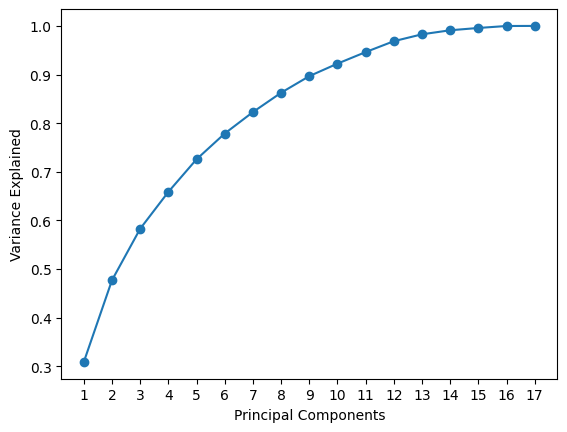

In [65]:
# Find ideal number of Principle Components 
n = dfd1.shape[1]
print('PCA for Developing Countires', longname, '\n')
findPCA(dfd1, varname, RandomForestRegressor(), n)

In [69]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 13
k=500
mdlacc = runModels(modellist, transformations, pca, k, varname, dfd1)

print('Model Performance for Developing Countries for', longname)
mdlacc.head(n=10)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18688\4025003083.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mdlacc = pd.concat([mdlacc, new_row], ignore_index=True)


Model Performance for Developing Countries for Diphtheria Vaccination Rates
CPU times: total: 5min 23s
Wall time: 6min 48s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
7,GradientBoostingRegressor(),none,0.77,0.54,0.23,111.41,267.20
5,RandomForestRegressor(),none,0.92,0.53,0.40,37.48,275.93
19,GradientBoostingRegressor(),PCA,0.80,0.48,0.31,99.82,300.98
1,LinearRegression(),none,0.43,0.47,-0.04,278.60,309.22
8,LinearRegression(),SS,0.43,0.47,-0.04,278.60,309.22
3,Ridge(),none,0.43,0.47,-0.04,278.86,309.48
10,Ridge(),SS,0.43,0.47,-0.04,278.86,309.48
13,LinearRegression(),PCA,0.42,0.45,-0.03,285.74,320.63
15,Ridge(),PCA,0.42,0.45,-0.03,285.74,320.66
17,RandomForestRegressor(),PCA,0.92,0.45,0.47,40.67,323.20


In [71]:
# Keep track of best models in a dataframe
bestmodels_Dip = pd.DataFrame(columns=[
    'Variable', 'Country Status', 'Best Default Model', 'Best Data Transform',
    'R2 Train', 'R2 Test', 'R2 Diff', 'RMSE Train', 'RMSE Test'
])

# Create the new row as a dictionary
new_row = {
    'Variable': varname,
    'Country Status': 'Developing',
    'Best Default Model': 'RandomForest',
    'Best Data Transform': 'none',
    'R2 Train': 0.97,
    'R2 Test': 0.81,
    'R2 Diff': 0.16,
    'RMSE Train': 4.7,
    'RMSE Test': 31.8
}

# Add the row to the DataFrame, handling the first row separately
if bestmodels_Dip.empty:
    bestmodels_Dip = pd.DataFrame([new_row], columns=bestmodels_Dip.columns)
else:
    new_row_df = pd.DataFrame([new_row], columns=bestmodels_Dip.columns)
    bestmodels_Dip = pd.concat([bestmodels_Dip, new_row_df], ignore_index=True)

PCA for Developed Countires Diphtheria Vaccination Rates 

[0.29305746 0.45332274 0.54985881 0.62450542 0.6902428  0.74853572
 0.80369826 0.85557167 0.90365982 0.93516005 0.9647213  0.98473105
 0.99413399 0.99721374 0.99975502 1.         1.        ]


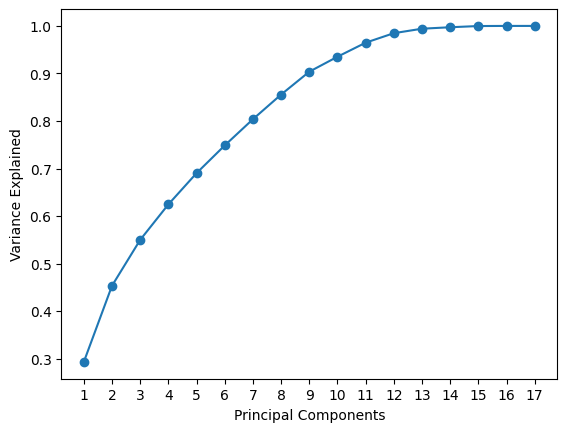

In [72]:
# Find ideal number of Principle Components 
n = dfd0.shape[1]
print('PCA for Developed Countires', longname, '\n')
findPCA(dfd0, varname, RandomForestRegressor(), n)

In [73]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k=100
mdlacc = runModels(modellist, transformations, pca, k, varname, dfd0)

print('Model Performance for Developed Countries', longname)
mdlacc.head(n=10)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18688\4025003083.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mdlacc = pd.concat([mdlacc, new_row], ignore_index=True)


Model Performance for Developed Countries Diphtheria Vaccination Rates
CPU times: total: 6.98 s
Wall time: 8.05 s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,DecisionTreeRegressor(),none,1.00,0.93,0.07,0.00,2.70
7,GradientBoostingRegressor(),none,1.00,0.54,0.46,0.28,17.12
5,RandomForestRegressor(),none,0.84,0.46,0.38,8.88,19.96
19,GradientBoostingRegressor(),PCA,0.99,0.21,0.77,0.76,29.07
6,AdaBoostRegressor(),none,0.93,0.20,0.73,4.02,29.51
18,AdaBoostRegressor(),PCA,0.90,0.12,0.78,5.68,32.52
21,LinearRegression(),KPCA,0.42,-0.01,0.43,32.09,37.27
22,Lasso(),KPCA,0.00,-0.01,0.01,55.55,37.27
23,Ridge(),KPCA,0.32,-0.01,0.33,37.96,37.27
2,Lasso(),none,0.03,-0.01,0.05,53.67,37.47


In [76]:
bestmodels_Dip = pd.DataFrame(columns=[
    'Variable', 'Country Status', 'Best Default Model', 'Best Data Transform',
    'R2 Train', 'R2 Test', 'R2 Diff', 'RMSE Train', 'RMSE Test'
])

# Create the new row as a dictionary
new_row = {
    'Variable': varname,
    'Country Status': 'Developing',
    'Best Default Model': 'RandomForest',
    'Best Data Transform': 'none',
    'R2 Train': 1.00,
    'R2 Test': 0.92,
    'R2 Diff': 0.08,
    'RMSE Train': 0.00,
    'RMSE Test': 2.87
}

# Add the row to the DataFrame, handling the first row separately
if bestmodels_Dip.empty:
    bestmodels_Dip = pd.DataFrame([new_row], columns=bestmodels_Dip.columns)
else:
    new_row_df = pd.DataFrame([new_row], columns=bestmodels_Dip.columns)
    bestmodels_Dip = pd.concat([bestmodels_Dip, new_row_df], ignore_index=True)

In [77]:
bestmodels_Dip

,Variable,Country Status,Best Default Model,Best Data Transform,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,Diphtheria,Developing,RandomForest,none,1.0,0.92,0.08,0.0,2.87


Best model performance for: Diphtheria Vaccination Rates in Developing Countries

Best Model:  RandomForestRegressor(max_depth=10, min_samples_split=25)

R2 on Training: 0.705393444008042
R2 on Test:     0.5319200892359957

Difference:  0.1734733547720464

RMSE on Training: 12.019173275475218
RMSE on Test:     16.533912364052597

Feature Importance:


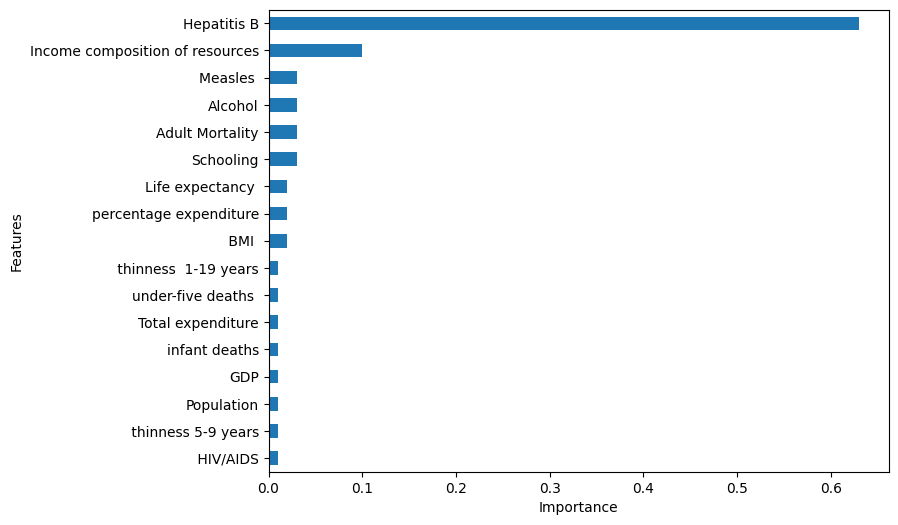

CPU times: total: 2min 41s
Wall time: 3min 1s


,Feature,Importance
5,Hepatitis B,0.63
15,Income composition of resources,0.10
16,Schooling,0.03
6,Measles,0.03
1,Adult Mortality,0.03
3,Alcohol,0.03
0,Life expectancy,0.02
7,BMI,0.02
4,percentage expenditure,0.02
8,under-five deaths,0.01


In [78]:
%%time 

# Tune the model 
print('Best model performance for:', longname, 'in Developing Countries')
features = tunedModel(varname, dfd1, RandomForestRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Diphtheria Vaccination Rates  in Developed Countries

Best Model:  DecisionTreeRegressor(max_depth=10, min_samples_split=5)

R2 on Training: 0.9961921532175263
R2 on Test:     0.9144280907453743

Difference:  0.08176406247215195

RMSE on Training: 0.45992050499965326
RMSE on Test:     1.7784982554952677

Feature Importance:


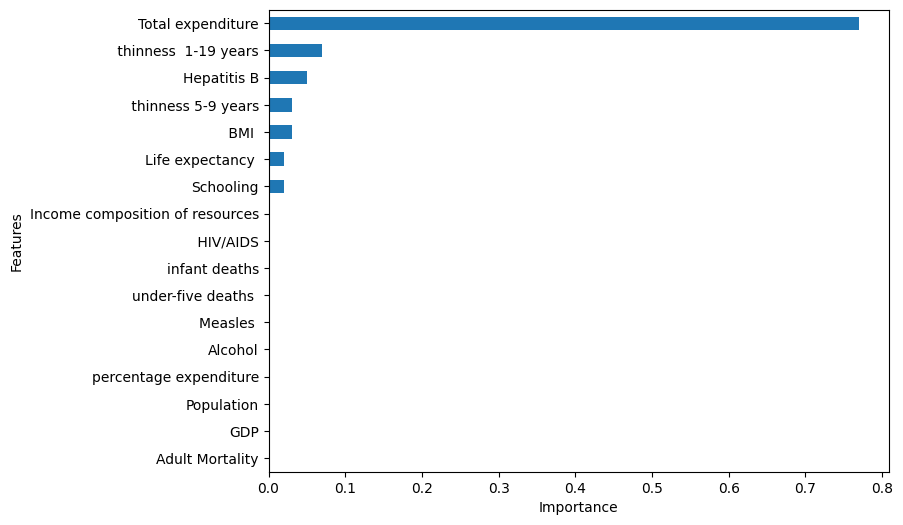

CPU times: total: 1.25 s
Wall time: 1.47 s


,Feature,Importance
9,Total expenditure,0.77
13,thinness 1-19 years,0.07
5,Hepatitis B,0.05
14,thinness 5-9 years,0.03
7,BMI,0.03
0,Life expectancy,0.02
16,Schooling,0.02
1,Adult Mortality,0.00
2,infant deaths,0.00
8,under-five deaths,0.00


In [79]:
%%time 

#Tune the model 
print('Best model performance for:', longname, ' in Developed Countries')
features = tunedModel(varname, dfd0, DecisionTreeRegressor, 'none', 0, 0)
features.head(n=10)

In [ ]:
##########

In [80]:
varname = 'Hepatitis B'
longname = 'Hepatitis B Vaccination Rates'

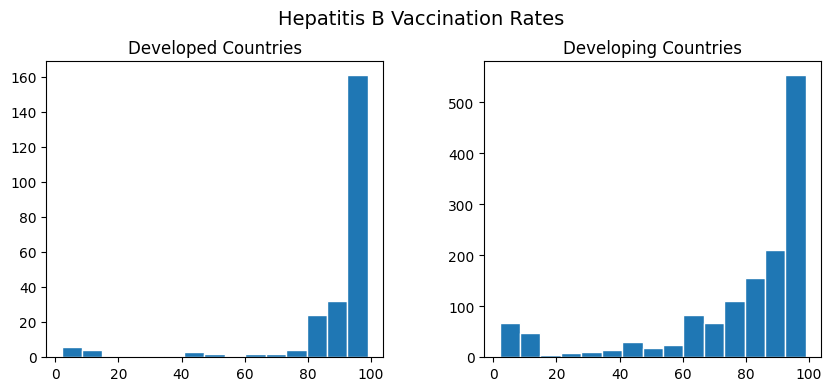

In [81]:
distributions(varname, longname, df)

In [82]:
# Split Developing and Developed Countries 
dfh1 = df3.loc[df3['Status_Developing']==1]
dfh0 = df3.loc[df3['Status_Developing']==0]
dfh1 = dfh1.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
dfh0 = dfh0.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
print(dfh1.shape)
print(dfh0.shape)


(1407, 19)
(242, 19)


In [83]:
print('Correlations with Hepatitis B Vaccination Rate in Developing Countries:\n')
dfh1[dfh1.columns[0:]].corr()['Hepatitis B'][:].to_frame().sort_values(by=['Hepatitis B'], ascending=False).round(2)

Correlations with Hepatitis B Vaccination Rate in Developing Countries:



,Hepatitis B
Hepatitis B,1.00
Diphtheria,0.61
Polio,0.47
Schooling,0.20
Life expectancy,0.17
Income composition of resources,0.15
BMI,0.11
Total expenditure,0.10
Alcohol,0.04
GDP,-0.03


In [84]:
print('Correlations with Hepatitis B Vaccination Rate in Developed Countries:\n')
dfh0[dfh0.columns[0:]].corr()['Hepatitis B'][:].to_frame().sort_values(by=['Hepatitis B'], ascending=False).round(2)

Correlations with Hepatitis B Vaccination Rate in Developed Countries:



,Hepatitis B
Hepatitis B,1.00
thinness 5-9 years,0.18
thinness 1-19 years,0.17
Adult Mortality,0.16
Diphtheria,0.09
BMI,0.09
Polio,0.07
under-five deaths,0.06
Measles,0.05
infant deaths,0.03


PCA for Developing Countires Hepatitis B Vaccination Rates 

[0.29979399 0.45806372 0.5566578  0.64143446 0.71298409 0.76415557
 0.80989156 0.84771221 0.88026641 0.90525056 0.928032   0.9501278
 0.97033131 0.98371485 0.99150821 0.99595596 0.99985972 1.        ]


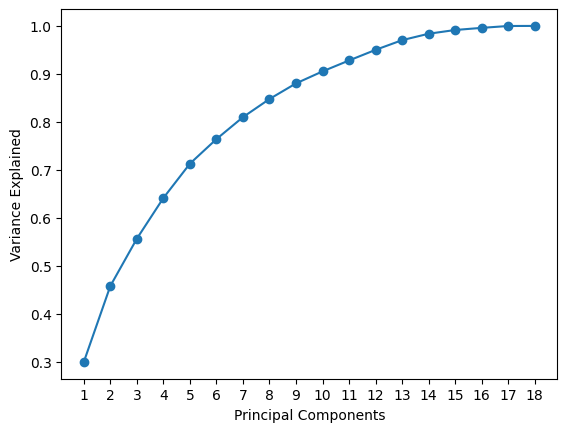

In [85]:
# Find ideal number of Principle Components 
n = dfh1.shape[1]
print('PCA for Developing Countires', longname, '\n')
findPCA(dfh1, varname, RandomForestRegressor(), n)

In [86]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k=500
mdlacc = runModels(modellist, transformations, pca, k, varname, dfh1)

print('Model Performance for Developing Countries for', longname)
mdlacc.head(n=10)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18688\4025003083.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mdlacc = pd.concat([mdlacc, new_row], ignore_index=True)


Model Performance for Developing Countries for Hepatitis B Vaccination Rates
CPU times: total: 2min 16s
Wall time: 2min 30s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
5,RandomForestRegressor(),none,0.93,0.53,0.39,48.26,346.96
7,GradientBoostingRegressor(),none,0.77,0.50,0.27,154.43,375.20
17,RandomForestRegressor(),PCA,0.91,0.49,0.42,57.11,380.27
3,Ridge(),none,0.44,0.46,-0.01,371.81,406.26
10,Ridge(),SS,0.44,0.46,-0.01,371.81,406.26
1,LinearRegression(),none,0.44,0.46,-0.01,371.80,406.33
8,LinearRegression(),SS,0.44,0.46,-0.01,371.80,406.33
9,Lasso(),SS,0.42,0.45,-0.02,383.80,413.43
2,Lasso(),none,0.42,0.45,-0.02,383.80,413.43
13,LinearRegression(),PCA,0.42,0.43,-0.01,384.38,422.01


In [88]:
# Keep track of best models in a dataframe
bestmodels_Hep = pd.DataFrame(columns=[
    'Variable', 'Country Status', 'Best Default Model', 'Best Data Transform',
    'R2 Train', 'R2 Test', 'R2 Diff', 'RMSE Train', 'RMSE Test'
])

# Create the new row as a dictionary
new_row = {
    'Variable': varname,
    'Country Status': 'Developing',
    'Best Default Model': 'RandomForest',
    'Best Data Transform': 'none',
    'R2 Train': 0.92,
    'R2 Test': 0.37,
    'R2 Diff': 0.54,
    'RMSE Train': 53.79,
    'RMSE Test': 489.77
}

# Add the row to the DataFrame, handling the first row separately
if bestmodels_Hep.empty:
    bestmodels_Hep = pd.DataFrame([new_row], columns=bestmodels_Hep.columns)
else:
    new_row_df = pd.DataFrame([new_row], columns=bestmodels_Hep.columns)
    bestmodels_Hep = pd.concat([bestmodels_Hep, new_row_df], ignore_index=True)

PCA for Developed Countires Hepatitis B Vaccination Rates 

[0.27360622 0.42593412 0.53616621 0.61498814 0.67810582 0.73747761
 0.79004994 0.83902023 0.88146767 0.91544945 0.94333395 0.96930921
 0.98600041 0.99455511 0.99753496 0.99979522 1.         1.        ]


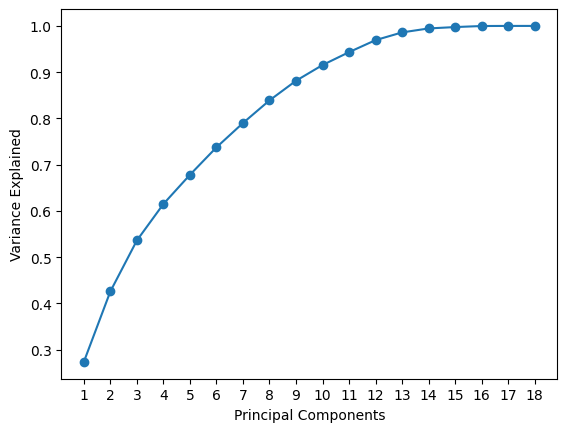

In [89]:

# Find ideal number of Principle Components 
n = dfh0.shape[1]
print('PCA for Developed Countires', longname, '\n')
findPCA(dfh0, varname, RandomForestRegressor(), n)

In [90]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k = 100
mdlacc = runModels(modellist, transformations, pca, k, varname, dfh0)

print('Model Performance for Developed Countries', longname)
mdlacc.head(n=10)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18688\4025003083.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mdlacc = pd.concat([mdlacc, new_row], ignore_index=True)


Model Performance for Developed Countries Hepatitis B Vaccination Rates
CPU times: total: 3.52 s
Wall time: 3.81 s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,DecisionTreeRegressor(),none,1.00,0.13,0.87,0.00,151.72
7,GradientBoostingRegressor(),none,0.98,0.08,0.90,7.98,160.91
27,GradientBoostingRegressor(),KPCA,0.99,-0.02,1.01,5.70,178.58
25,RandomForestRegressor(),KPCA,0.82,-0.02,0.84,80.55,179.15
4,SVR(),none,-0.07,-0.03,-0.05,479.05,179.53
11,SVR(),SS,-0.07,-0.03,-0.05,479.05,179.53
26,AdaBoostRegressor(),KPCA,0.88,-0.03,0.91,51.49,179.67
16,SVR(),PCA,-0.07,-0.03,-0.04,479.86,180.99
6,AdaBoostRegressor(),none,0.81,-0.05,0.87,84.21,184.61
5,RandomForestRegressor(),none,0.90,-0.06,0.96,44.17,185.00


In [96]:
# Keep track of best models in a dataframe
bestmodels_Hep = pd.DataFrame(columns=[
    'Variable', 'Country Status', 'Best Default Model', 'Best Data Transform',
    'R2 Train', 'R2 Test', 'R2 Diff', 'RMSE Train', 'RMSE Test'
])

# Create the new row as a dictionary
new_row = {
    'Variable': varname,
    'Country Status': 'Developing',
    'Best Default Model': 'RandomForest',
    'Best Data Transform': 'none',
    'R2 Train': 0.98,
    'R2 Test': 0.12,
    'R2 Diff': 0.86,
    'RMSE Train': 7.90,
    'RMSE Test': 153.48
}

# Add the row to the DataFrame, handling the first row separately
if bestmodels_Hep.empty:
    bestmodels_Hep = pd.DataFrame([new_row], columns=bestmodels_Hep.columns)
else:
    new_row_df = pd.DataFrame([new_row], columns=bestmodels_Hep.columns)
    bestmodels_Hep = pd.concat([bestmodels_Hep, new_row_df], ignore_index=True)

In [97]:

bestmodels_Hep

,Variable,Country Status,Best Default Model,Best Data Transform,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,Hepatitis B,Developing,RandomForest,none,0.98,0.12,0.86,7.9,153.48


Best model performance for: Hepatitis B Vaccination Rates in Developing Countries

Best Model:  RandomForestRegressor(max_depth=5, min_samples_split=50)

R2 on Training: 0.5621285086636616
R2 on Test:     0.48526814841306853

Difference:  0.07686036025059306

RMSE on Training: 17.074230321543435
RMSE on Test:     19.591739829789223

Feature Importance:


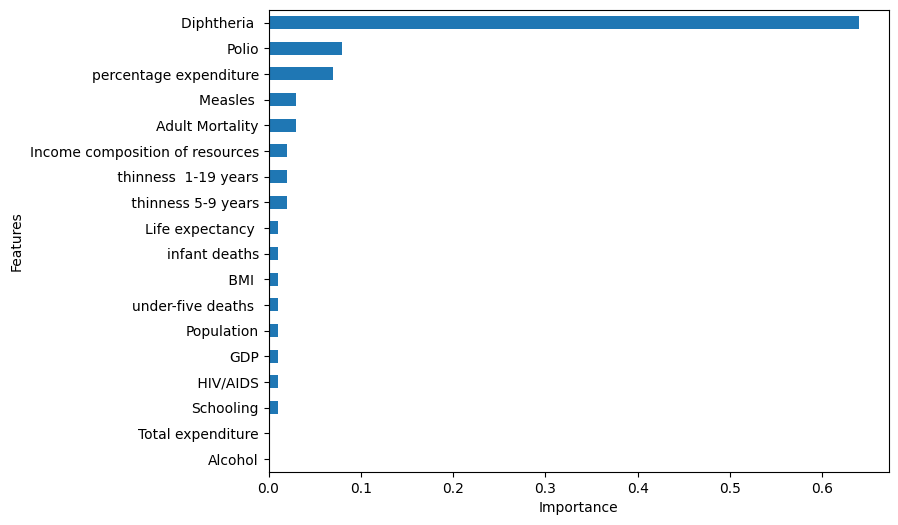

CPU times: total: 1min 16s
Wall time: 1min 20s


,Feature,Importance
10,Diphtheria,0.64
8,Polio,0.08
4,percentage expenditure,0.07
1,Adult Mortality,0.03
5,Measles,0.03
14,thinness 1-19 years,0.02
16,Income composition of resources,0.02
15,thinness 5-9 years,0.02
0,Life expectancy,0.01
2,infant deaths,0.01


In [98]:
%%time 

# Tune the model 
print('Best model performance for:', longname, 'in Developing Countries')
features = tunedModel(varname, dfh1, RandomForestRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Hepatitis B Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor(learning_rate=0.01, n_estimators=50)

R2 on Training: 0.25857777826035167
R2 on Test:     -0.06575155312869296

Difference:  0.32432933138904463

RMSE on Training: 18.197805175456384
RMSE on Test:     13.657986865761568

Feature Importance:


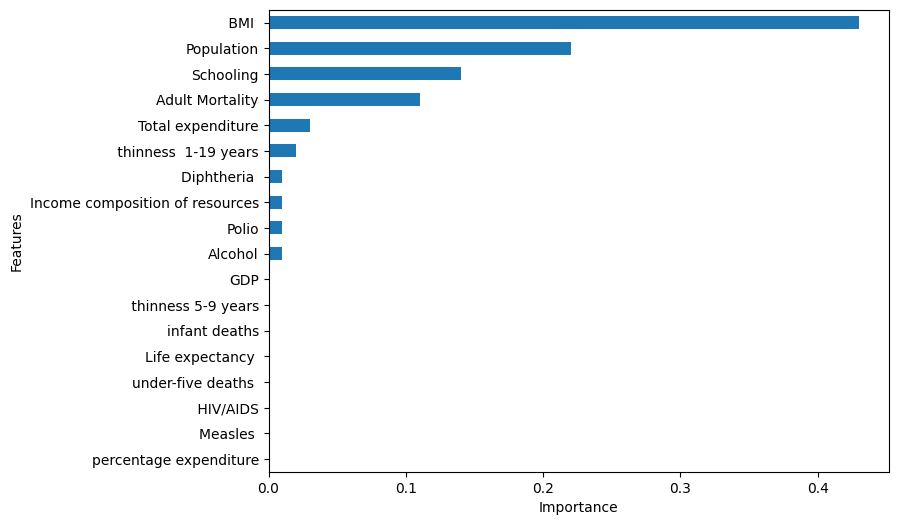

CPU times: total: 5.88 s
Wall time: 6.65 s


,Feature,Importance
6,BMI,0.43
13,Population,0.22
17,Schooling,0.14
1,Adult Mortality,0.11
9,Total expenditure,0.03
14,thinness 1-19 years,0.02
16,Income composition of resources,0.01
10,Diphtheria,0.01
3,Alcohol,0.01
8,Polio,0.01


In [99]:

%%time 

#Tune the model 
print('Best model performance for:', longname, ' in Developed Countries')
features = tunedModel(varname, dfh0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Hepatitis B Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor()

R2 on Training: 0.9821336993022493
R2 on Test:     0.10747272005481412

Difference:  0.8746609792474351

RMSE on Training: 2.82490294573817
RMSE on Test:     12.498832649223155

Feature Importance:


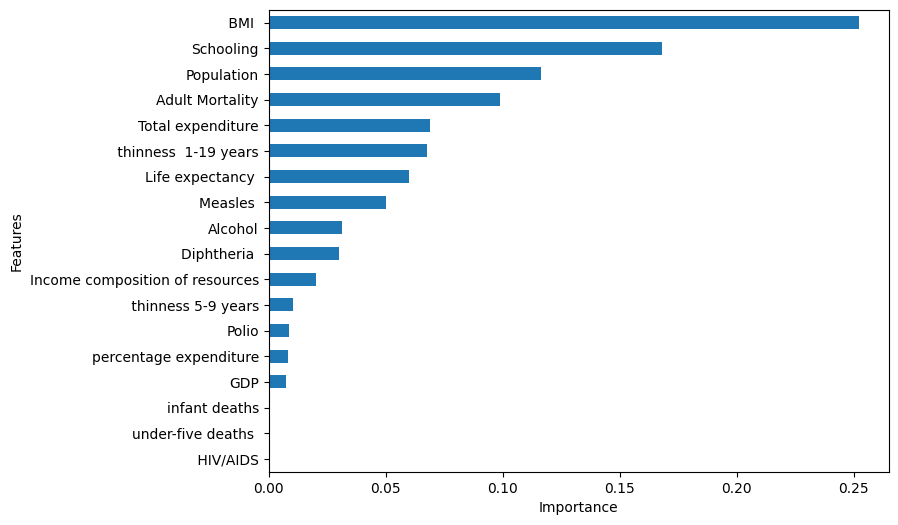

CPU times: total: 250 ms
Wall time: 283 ms


,Feature,Importance
6,BMI,0.252323
17,Schooling,0.168110
13,Population,0.116273
1,Adult Mortality,0.098736
9,Total expenditure,0.069149
14,thinness 1-19 years,0.067718
0,Life expectancy,0.059996
5,Measles,0.050126
3,Alcohol,0.031447
10,Diphtheria,0.030143


In [100]:
%%time 

#Default settings were better 
print('Best model performance for:', longname, ' in Developed Countries')
features = defaultSettings(varname, dfh0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)